# 台灣確診者各年齡層分布

In [10]:
import requests
from io import StringIO
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from datetime import datetime
from matplotlib import dates
pd.options.mode.chained_assignment = None

In [11]:
r = requests.post(
    'https://od.cdc.gov.tw/eic/Day_Confirmation_Age_County_Gender_19CoV.json')
r.encoding = 'uft-8'

df = pd.read_json(StringIO(r.text.replace("/", "-")))

mdf = pd.DataFrame(columns=['Time', '0-9', '10-19', '20-39', '40-59', '60+'])
mdf['Time'] = pd.date_range(
    start="2021-05-17", end=datetime.today().strftime('%Y-%m-%d'))
mdf = mdf.replace(np.nan, 0)

In [12]:
for i in range(len(mdf)):
    for j in range(len(df)):
        date = str(df['個案研判日'][j])[0:4]+'-'+str(df['個案研判日']
                                                [j])[4:6]+'-'+str(df['個案研判日'][j])[6:8]
        if (((df['年齡層'][j] == '0-4') or (df['年齡層'][j] == '5-9')) and date == mdf['Time'][i].strftime('%Y-%m-%d')):
            mdf['0-9'][i] = df['確定病例數'][j] + mdf['0-9'][i]
        if (((df['年齡層'][j] == '10-14') or (df['年齡層'][j] == '15-19')) and date == mdf['Time'][i].strftime('%Y-%m-%d')):
            mdf['10-19'][i] = df['確定病例數'][j] + mdf['10-19'][i]
        if (((df['年齡層'][j] == '20-24') or (df['年齡層'][j] == '25-29') or (df['年齡層'][j] == '30-34') or (df['年齡層'][j] == '35-39')) and date == mdf['Time'][i].strftime('%Y-%m-%d')):
            mdf['20-39'][i] = df['確定病例數'][j] + mdf['20-39'][i]
        if (((df['年齡層'][j] == '40-44') or (df['年齡層'][j] == '45-49') or (df['年齡層'][j] == '50-54') or (df['年齡層'][j] == '55-59')) and date == mdf['Time'][i].strftime('%Y-%m-%d')):
            mdf['40-59'][i] = df['確定病例數'][j] + mdf['40-59'][i]
        if (((df['年齡層'][j] == '60-64') or (df['年齡層'][j] == '65-69') or (df['年齡層'][j] == '70+')) and date == mdf['Time'][i].strftime('%Y-%m-%d')):
            mdf['60+'][i] = df['確定病例數'][j] + mdf['60+'][i]

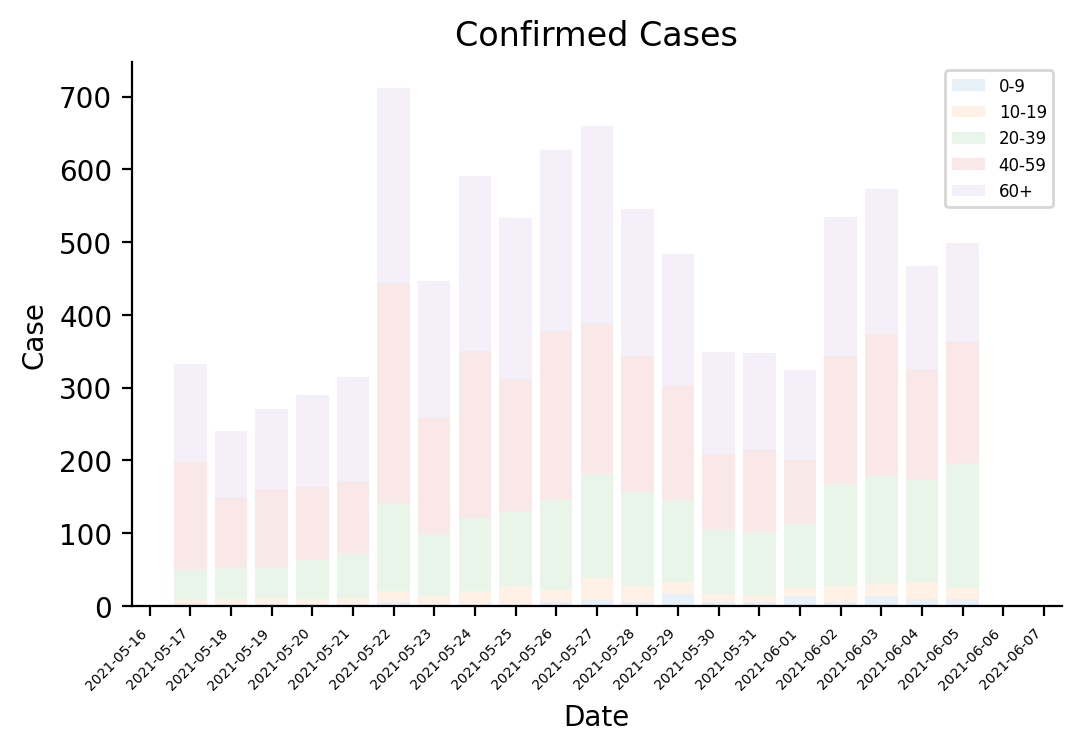

In [14]:
fig, ax = plt.subplots(dpi=200)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.bar(mdf["Time"], mdf["0-9"], alpha=0.1, label="0-9")
plt.bar(mdf["Time"], mdf["10-19"], alpha=0.1, label="10-19", bottom=mdf["0-9"])
plt.bar(mdf["Time"], mdf["20-39"], alpha=0.1, label="20-39", bottom=mdf["0-9"]+mdf["10-19"])
plt.bar(mdf["Time"], mdf["40-59"], alpha=0.1, label="40-59", bottom=mdf["0-9"]+mdf["10-19"]+mdf["20-39"])
plt.bar(mdf["Time"], mdf["60+"], alpha=0.1, label="60+", bottom=mdf["0-9"]+mdf["10-19"]+mdf["20-39"]+mdf["40-59"])
plt.legend(prop={'size': 6})
plt.xlabel("Date")
ax.xaxis.set_major_locator(dates.DayLocator(interval=1))
fig.autofmt_xdate(rotation=45)
plt.xticks(fontsize=5)
plt.ylabel("Case")
plt.title('Confirmed Cases')
plt.show()

Table data:

In [15]:
print(mdf)

         Time  0-9  10-19  20-39  40-59  60+
0  2021-05-17    4      4     43    147  134
1  2021-05-18    3      7     42     98   90
2  2021-05-19    2      9     42    107  110
3  2021-05-20    2      8     53    100  127
4  2021-05-21    2      9     61     99  143
5  2021-05-22    5     15    120    304  268
6  2021-05-23    3     10     87    158  188
7  2021-05-24    2     18    101    229  241
8  2021-05-25    3     24    104    181  221
9  2021-05-26    5     17    125    231  249
10 2021-05-27    8     30    144    207  270
11 2021-05-28    6     22    128    187  203
12 2021-05-29   16     17    112    157  181
13 2021-05-30    5     11     89    104  140
14 2021-05-31    5     10     88    113  132
15 2021-06-01   14     12     88     87  123
16 2021-06-02    6     21    142    175  191
17 2021-06-03   13     17    149    194  200
18 2021-06-04   10     23    140    153  141
19 2021-06-05    9     16    171    168  135
20 2021-06-06    0      0      0      0    0
